# 「**Deep Learning**の扉」　　
### ④**Python**を使ってニューラルネットワークの**誤差逆伝播法**を学ぶ
__________________________

## 1. 「Deep Learning」のさらなる手法を！！

前回、基礎編と応用編を通して、ニューラルネットワークの学習について学んできました。

ニューラルネットワークの学習を大まかに言えば、勾配を計算し、その勾配を使ってパラメータを更新する、というものになりました。

また、この勾配を求める時に、数値微分を使いました。

数値微分はシンプルで比較的理解しやすく、実装も簡単だったと思います。（少し工夫は必要でしたが…）

しかし、計算が完了するまでにとてつもなく時間がかかるというデメリットがありました。

今回は、勾配の計算を効率よく行う手法である「誤差逆伝搬法」について学びたいと思います！！

誤差逆伝播法を理解するために、数式と計算グラフを使って話を進めていきたいと思います！！

それでは、楽しんでいきましょう！！

### Let's go!!

-----------

## 2.計算グラフ

まず、計算グラフについて説明していきたいと思います。

計算グラフとは、計算の過程をグラフによって表したものになります。

ここで言うグラフとは、データ構造としてのグラフであり、複数のノードとエッジによって表現されます。（ノード間を結ぶ直線を「エッジ」と言います）

ノードとエッジについては図で紹介します。

この章では、計算グラフに慣れるために、簡単な問題から始めたいと思います。

### 2-1.計算グラフで簡単な問題に挑戦！！

それでは、簡単な問題を「計算グラフ」を使って解いていきましょう。

簡単な問題を使うので、暗算でも解けてしまいますが、計算グラフに慣れることが重要です。

------

【問題2-1】蘭さんはスーパーで１個100円のリンゴを２個買いました。合計何円になるでしょうか。ただし、消費税が10%適用されるものとします。

下の「・・・」を押して答えを確認してください。


### 220円


計算グラフはノードと矢印によって計算の過程を表します。ノードは○で表し、○の中に演算の内容を書きます。（例えば、+や-、×、÷など…）

また、計算の途中結果を矢印の上部に書くことによって、ノードごとの計算結果が左から右へ伝わるように表します。

問題を計算グラフで解くと、以下の図のようになります。

<img src="img4_1_1.png" style="width: 700px; float:left;">

図2-1

図に示すように、最初にリンゴの100円が「×2」ノードへ流れ、200円になって次のノードに伝達されます。

続いて、その200円が「×1.1」ノードへ流れ220円になります。

よって、この計算グラフの結果から、答えは220円ということになります。

また、以下の図のように分けて表記することもできます。

<img src="img4_1_2.png" style="width: 700px; float:left;">

図2-2

-----

それでは次の問題。

【問題2-2】蘭さんはスーパーでリンゴを２個、みかんを３個買いました。リンゴは１個100円、みかんは１個150円です。合計何円になるでしょうか。今回も消費税は10%として考えます。

下の「・・・」を押して答えを確認してください。

### 715円

問題2-1と同様に、計算グラフによって問題2-2の問題を解きます。計算グラフは以下の図のようになります。

<img src="img4_1_3.png" style="width: 700px; float:left;">

図2-3

この問題では、加算ノードである「+」が新しく加わり、リンゴとみかんの金額を合算します。

計算グラフを作ったら、左から右へと計算を進めていきます。

一番右まで計算結果がたどり着いたらそこで終了になります。

計算グラフより、答えは「715円」になります。

-------

計算グラフを使って問題を解くには、

1. 計算グラフを構築する
2. 計算グラフ上で計算を左から右へ進める

という流れで行います。

ここで「2.計算グラフ上で計算を左から右へ進める」というステップは、順方向の伝播であり、「順伝播」と言います。

また、右から左へと進める逆方向の伝播も存在します。

これを「逆伝播」と言います。

逆伝播はとても重要な内容となります。

### 2-2.局所的な計算

計算グラフの特徴は、「局所的な計算」を伝播することによって最終的な結果を得ることができる点にあります。

局所的というのは、「自分に関係する小さな範囲」つまり部分的ということを意味します。

局所的な計算とは、全体でどのような計算が行われていても、自分に関係する情報だけから次の結果を出力することができる、ということを表しています。

局所的な計算について具体的に考えてみましょう。

<img src="img4_1_16.png" style="width: 700px; float:left;">

図2-4

上図の計算グラフで示すように、たくさんの買い物を行い、その金額が4000円になったとします。

ここで大切なポイントは、各ノードにおける計算は局所的な計算であるということです。

これは、例えば、リンゴとそれ以外の買い物を合計する計算

「4000 + 200 = 4200」

は、4000という数字がどのように計算されてきたかということについては全く関係なく、

ただ二つの数字を足せば良いということを意味します。

つまり、各ノードの計算で行うべきことは、自分に関係する計算だけであり、全体的にどんな計算が行われているのかを考える必要はありません。

このように、計算グラフでは、局所的な計算に集中することができます。

例えば、蘭さんが果物ジュースのお店で働いているとします。

そのお店では、果物を使って、果物ジュースを作り、その果物ジュースをカップに注いで提供します。

また、蘭さんは、カップに注ぐ役割を担当しているとします。

この時、蘭さんは、果物がどこで、どのように育てられ、どんな手順を踏んで届けられたかは全く関係なく、果物ジュースをカップに注ぐと思います。

このように、全体的に見ると複雑ですが、蘭さんの役割に注目すると、単純であることがわかります。

### 2-3.なぜ計算グラフを使うのか。

計算グラフを使って、簡単な問題を二つ解いてもらいました。

では、計算グラフを使うメリットとは何なのでしょうか。

一つは、先ほども説明したように、「局所的な計算に集中することができる」というところにあります。

全体の計算がどんなに複雑であろうと、局所的な計算に集中することで、問題を単純化することができます。

また、もう一つのメリットとして、計算グラフによって、途中の計算の結果を全て保持することができます。

例えば、2個のリンゴの値段は200円、消費税を考えると220円など、部分部分で計算結果が保持されます。

計算グラフを使うメリットは、これだけでは終わりません。

もう一つ重要なポイントが存在します。

それは、先ほども少し紹介しましたが、「逆伝播」というところにあります。

「逆伝播」を使うことで、「微分」を効率よく計算することができます。

それでは、計算グラフの逆伝播を説明するにあたって、問題2-1をもう一度考えてみましょう。

例えば、リンゴの値段が値上がりした場合、最終的な支払い金額にどのように影響するかを知りたいとします。

これは、わかりにくいかもしれませんが、「リンゴの値段に関する支払い金額の微分」を求めることに相当します。

この微分の値は、リンゴの値段が少しだけ値上がりした場合に、支払い金額がどれだけ増加するか、ということを表したものになります。

数学的に表してみましょう。

リンゴの値段を「x」とし、支払い金額を「L」とした場合、「リンゴの値段に関する支払い金額の微分」は、

$$
    \frac{∂L}{∂x}
$$

に相当します。

例えば、リンゴを２個買う場合、１個あたりの値段が変化すると、以下のように合計金額が変化します。

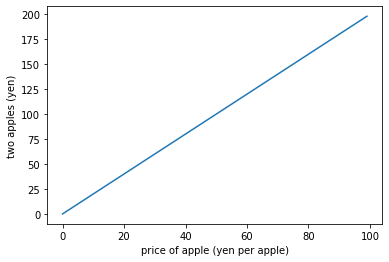

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100, 1)
y = 2*x

plt.plot(x, y)
plt.xlabel('price of apple (yen per apple)')
plt.ylabel('two apples (yen)')
plt.show()

数式的に見ると、

$$
    y = 2x
$$

であり、簡単な式で表すことができます。

１個あたりのリンゴの値段を入力すれば、合計金額は求められるのですが、１個あたりの値段が１円値上がりすると、合計金額が何円増えるのかは、この式だけではわかりません。

もちろん、丁寧に計算すれば求めることはできます。

例えば、リンゴ１個が100円の場合。

$$
    x_1 = 100\\
    y_1 = 2\times100\\
    y_1 = 200
$$

次に、リンゴ１個が101円の場合。

$$
    x_2 = 101\\
    y_2 = 2\times101\\
    y_2 = 202
$$

最終的に、この二つの合計を引けば、１個あたりの値段が１円値上がりすると、合計金額が何円増えるのか求めることができます。

$$
    a = y_2 - y_1\\
    a = 202 - 200\\
    a = 2
$$

つまり、１個あたりの値段が１円値上がりすると、合計金額は２円増えることがわかりました。

正直面倒ですよね。

式自体が簡単なので、計算は難しくないのですが、手間がかかります。

そこで、微分が使います。

微分を使うと、

$$
    \frac{∂L}{∂x}\\
    =\frac{∂2x}{∂x}\\
    =2
$$

このように、簡単に「２」という値を得ることができます。

これが先ほど説明した「リンゴの値段に関する支払い金額の微分」になります。

この「リンゴの値段に関する支払い金額の微分」のような値は、計算グラフで逆方向の伝播を行えば求めることができます。

では、逆伝播を表してみましょう。

<img src="img4_1_5.png" style="width: 700px; float:left;">

図2-5

上図のように、逆伝播の場合は、順方向とは逆向きの矢印によって図示します。

逆伝播は「局所的な微分」を伝達し、その微分の値は矢印の下側に書くことにします。

この場合、逆伝播は右から左へ「1→1.1→2.2」と微分の値が伝達されていきます。

この結果から、「リンゴの値段に関する支払い金額の微分」の値は「2.2」ということができます。

これは、リンゴが１円値上がりしたら、最終的な支払い金額が2.2円増えることを意味します。

ここでは、リンゴの値段に関する微分だけを求めましたが、「消費税に関する支払いの金額の微分」や「リンゴの個数に関する支払い金額の微分」も同様の手順で求めることができます。

そして、途中まで求めた微分の結果（数値）を共有することができ、効率よく複数の微分を計算することができるのです。

このように、計算グラフのメリットは、順伝播と逆伝播によって、各変数の微分の値を効率よく求めることができるというところにあります。

## 3.連鎖律

これまで行ってきた計算グラフの順伝播は、計算の結果を順方向に伝達し、

逆方向の伝播では**「局所的な微分」**を、逆方向に伝達していきます。

この**「局所的な微分」**を伝達する原理は、**連鎖律**によるものになります。

### 3-1.計算グラフの逆伝播

それでは、計算グラフを使った逆伝播の例を示します。

ここでは、

$$
    y = f(x)
$$

を扱って考えたいと思います。

<img src="img4_1_6.png" style="width: 700px; float:left;">

図3-1

上図のように、逆伝播の計算手順は、信号Eに対して、ノードの局所的な微分

$$
    \frac{∂y}{∂x}
$$

を掛け、それを次のノードに伝達していきます。

$$
    E\frac{∂y}{∂x}
$$

ここで言う局所的な微分とは、順伝播での

$$
    y = f(x)
$$

の微分を求めるということであり、これは、xに関するyの微分を求めることを意味します。

例えば、

$$
    y = f(x) = x^2
$$

の場合、

$$
    \frac{∂y}{∂x} = 2x
$$

になります。

これが逆伝播で行う計算手順ですが、この計算を行うことで、目的とする微分の値を効率よく求めることができるのが逆伝播のポイントになります。

なぜ、そのようなことができるのかは、**「連鎖律」**の原理から説明することができます。

### 3-2.連鎖律とは

連鎖律を説明する前に、合成関数について話していきたいと思います。

合成関数とは、簡単に言うと、複数の関数によって構成される関数のことになります。

例えば、

$$
    z = (x + y)^2
$$

の場合、以下の式で構成されます。

$$
    z = t^2\\
    t = x + y
$$

**連鎖律**とは、合成関数の微分についての性質であり、次のように定義されます。

#### ある関数が合成関数で表される場合、その合成関数の微分は、合成関数を構成するそれぞれの関数の微分の積によって表すことができる。

先ほどの例において

$$
    \frac{∂z}{∂x}
$$

は、

$$
    \frac{∂z}{∂t}と\frac{∂t}{∂x}
$$

の積によって表すことができます。

数式で表すと、

$$
    \frac{∂z}{∂x} = \frac{∂z}{∂t}\frac{∂t}{∂x}
$$

となります。

それでは、連鎖律を使って、

$$
    z = (x + y)^2
$$

の微分

$$
    \frac{∂z}{∂x}
$$

を求めてみましょう。

まず、局所的な微分を先に求めます。

$$
    \frac{∂z}{∂t} = 2t
$$

$$
    \frac{∂t}{∂x} = 1
$$

最終的に求めたい

$$
    \frac{∂z}{∂x}
$$

は、先ほど計算した局所的な微分の積によって計算できます。

つまり、

$$
    \frac{∂z}{∂x} = \frac{∂z}{∂t}\frac{∂t}{∂x} = 2t\times1\\
$$

となります。

また、

$$
    t = x + y
$$

なので、

$$
    \frac{∂z}{∂x} = 2(x + y)
$$

となります。

### 3-3.連鎖律と計算グラフ

それでは、先ほど行った連鎖律の計算を、計算グラフで表してみましょう。

2乗の計算を「**2」というノードで表すとすれば、以下のように書くことができます。

また、

$$
        z = (x + y)^2
$$

で完結する計算を考えているので、上流から流れてくる値はなく、出力値zを使って考えます。

<img src="img4_1_7.png" style="width: 700px; float:left;">

図3-2

逆伝播の計算手順では、ノードへの入力信号に対して、ノードの局所的な微分を乗算して次のノードへと伝達していきます。

例えば、「**2」への逆伝播時の入力は、出力値zをzで微分した値となるので、

$$
    \frac{∂z}{∂z}
$$

となります。

また、これに局所的な微分である

$$
    \frac{∂z}{∂t}
$$

を乗算して、次のノードへ渡していきます。

さて、図で注目すべきことは、一番左の逆伝播の結果になります。

これは、連鎖律より、

$$
    \frac{∂z}{∂z}\frac{∂z}{∂t}\frac{∂t}{∂x}\\
    =\frac{∂z}{∂t}\frac{∂t}{∂x}\\
    =\frac{∂z}{∂x}
$$

が成り立ち、「xに関するzの微分」に対応します。

つまり、逆伝播が行っていることは、連鎖律の原理から構成されているのです。

$$
    z = (x + y)^2
$$

を先ほどの図に適用すると、以下のようになります。

<img src="img4_1_8.png" style="width: 700px; float:left;">

図3-3

## 4.逆伝播

前節では、計算グラフの逆伝播が連鎖律によって成り立つことを説明しました。

ここでは、「+」や「×」などの演算を例に、逆伝播の仕組みについて説明します。

### 4-1.加算ノードの逆伝播

はじめに加算ノードの逆伝播について考えていきます。

ここでは、

$$
    z = x + y
$$

という式を対象にして、その逆伝播を見ていきます。

まず、微分を計算すると、

$$
    \frac{∂z}{∂x} = 1\\
    \frac{∂z}{∂y} = 1
$$

となります。

これらのことを考えると、以下の図のように書くことができます。

<img src="img4_1_9.png" style="width: 700px; float:left;">

図4-1

上図に示すように、逆伝播の際には、上流から伝わった微分に1を乗算して、下流に流します。

つまり、加算ノードの逆伝播は１を乗算するだけなので、入力された値をそのまま次のノードへ流すだけになります。

$$
    z = x + y
$$

という計算は、その大きな計算グラフのどこかに存在し、上流から

$$
    \frac{∂L}{∂z}
$$

の値が伝わることになります。

そして、下流にはそれぞれ

$$
    \frac{∂L}{∂x} = \frac{∂L}{∂z}\frac{∂z}{∂x}\\
    \frac{∂L}{∂y} = \frac{∂L}{∂z}\frac{∂z}{∂y}
$$

の値を伝達していくのです。

それでは、具体例を見ていきたいと思います。

例えば、「10+5=15」という計算があるとして、逆伝播の場合、上流から1.3の値が流れてくるとします。

これを計算グラフで表すと以下のようになります。

<img src="img4_1_10.png" style="width: 700px; float:left;">

図4-2

### 4-2.乗算ノードの逆伝播

続いて乗算ノードの逆伝播について説明します。

ここでは、

$$
    z = xy
$$

という式を考えます。

この式の微分は、

$$
    \frac{∂z}{∂x} = y\\
    \frac{∂z}{∂y} = x
$$

となります。

このことから、計算グラフは以下のように表すことができます。

<img src="img4_1_11.png" style="width: 700px; float:left;">

図4-3

乗算の逆伝播の場合は、上流の値に、順伝播の際の入力信号をひっくり返した値を乗算して下流へ流します。

ここで、具体例を見ていきたいと思います。

例えば、「5×10 = 50」という計算を考えます。

逆伝播の際には、上流から1.3の値が流れてくるとします。

この場合、計算グラフは以下のようになります。

<img src="img4_1_12.png" style="width: 700px; float:left;">

図4-4

乗算の逆伝播は、入力信号をひっくり返した値を掛けるので、

$$
    1.3\times10 = 13\\
    1.3\times5 = 6.5
$$

とそれぞれ計算することができます。

このように、乗算の逆伝播では、順伝播の時の入力信号の値が必要になります。

そのため、乗算ノードの実装時には、順伝播の入力信号を保持します。

### 4-3.リンゴの例

ここで、最初に考えたリンゴの例について見ていきたいと思います。

リンゴ２個と消費税について考えました。

ここで解きたい問題は、リンゴの値段、リンゴの個数、消費税の３つの変数それぞれが最終的な支払い金額にどのように影響するか、ということになります。

つまり、

#### ・「リンゴの値段に関する支払金額の微分」

#### ・「リンゴの個数に関する支払金額の微分」

#### ・「消費税に関する支払金額の微分」

を求めることに相当します。

これを計算グラフの逆伝播を使って考えると、以下のようになります。

<img src="img4_1_13.png" style="width: 700px; float:left;">

図4-5

これまで説明してきたとおり、乗算ノードの逆伝播では、入力信号がひっくり返って下流へと流れます。

上図の結果より、

#### リンゴの値段の微分は2.2

#### リンゴの個数の微分は110

#### 消費税の微分は200

となります。

例えば、

消費税とリンゴの値段が同じ量だけ増加したら、

消費税は200の大きさで最終的な支払金額に影響を与え、

リンゴの値段は2.2の大きさで影響を与えると解釈できます。

この例において、注意すべきポイントが一つあります。

それは、消費税とリンゴの値段のスケールが異なるということです。

消費税の1は100%、リンゴの値段の1は1円になります。

--------

例）リンゴの値段が100円から101円になる場合

リンゴの値段が100円から101円になると、最終的な支払金額は

$$
    (101 - 100)\times2.2 = 2.2円
$$

増加します。

例）消費税が10%から20%になる場合

また、消費税が10%から20%になると、最終的な支払金額は

$$
    \frac{20-10}{100}\times200 = 20円
$$

増加します。

-----

それでは、最後に練習問題として、「リンゴとみかんの買い物」の逆伝播を考えてみましょう！

【問題4-1】リンゴとみかんの買い物の逆伝播を考え、それぞれの変数の微分を求めてください。

<img src="img4_1_14.png" style="width: 700px; float:left;">

図4-6

以下の「・・・」を押すと、答えが表示されます。

<img src="img4_1_15.png" style="width: 700px; float:left;">

## 5.単純なレイヤの実装

この章では、またまた「リンゴの買い物」の例を使って、Pythonで実装していきたいと思います！

ここでは、計算グラフの乗算ノードを「乗算レイヤ」、加算ノードを「加算レイヤ」という名前で実装していきます。（レイヤとは、層のことを表します。）

### 5-1.乗算レイヤの実装

レイヤは、「forward()」と「backward()」という共通のメソッドを持つように実装します。

#### forward()：順伝播

#### backward()：逆伝播

に対応します。

それでは、乗算レイヤを実装していきます。

ここでは、「MulLayer」という名前を付けます。

「乗算」は英語で「multiplication」と言います。

そのため、頭の三文字を取って、「MulLayer」とします。

In [15]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy

このように乗算レイヤを実装することができます。

それでは、コードについて説明していきたいと思います。

In [ ]:
def __init__(self):

では、インスタンス変数である「x」と「y」の初期化を行いますが、これは、順伝播時の入力値を保持するために用います。

In [ ]:
self.x = x
self.y = y

というように、値を代入することで、順伝播だけでなく、逆伝播の時にもこの値を使うことができます。

なぜ、

In [ ]:
def __init__(self):
    self.x = a
    self.y = b

としないのか。

このように初期化をしてしまうと、「MulLayer」はある値「a」と「b」だけに対応した汎用性のない乗算レイヤになってしまいます。

そこで、

In [ ]:
def forward(self, x, y):
    self.x = x
    self.y = y

と、このようにすることで、下流からどんな値が流れてきても大丈夫なようになります。

また、先ほども説明しましたが、値を保持することができるので、逆伝播の際にこの値を使うことができます。

また、

In [ ]:
def backward(self, dout):

では、上流から伝わってきた微分「dout」に対して、順伝播のひっくり返した値を乗算して下流に流します。

それでは、この「MulLayer」を使って、これまで見てきた「リンゴの買い物」を実装してみましょう。

<img src="img4_1_13.png" style="width: 700px; float:left;">

図5-1

In [9]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(round(price, 2))

220.0


また、各変数に関する微分は、backward()で求めることができます。

In [34]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("dapple：", dapple)
print("dapple_num：", round(dapple_num))
print("dtax：", dtax)

dapple： 2.2
dapple_num： 110
dtax： 650


ここで、backward()の呼び出す順番は、forward()のときと逆の順番で行います。

また、backward()の引数は、「順伝播の際の出力変数に対する微分」を入力することに注意してください。

例えば、mul_apple_layerという乗算レイヤの出力は、２個のリンゴの値段「apple_price」なので、逆伝播の際には、「apple_price」の微分である「dapple_price」を引数に設定します。

【問題5-1】乗算レイヤをもう一度実装し、以下の条件について順伝播の値と逆伝播の値を計算してください。その際、計算グラフを紙に書いてみること。

リンゴの値段：110円  
リンゴの個数：3個  
消費税：10%

In [ ]:
######以下にコードを書いてください######






######「Shift+Enter」を押してください######

【問題5-2】問題5-1で作成した「MulLayer」を使って、順伝播の値と逆伝播の値を計算してください。

蘭さんは、みたらし団子を３本買いました。その時、クーポンを持っていたので使用しました。そのクーポンは税込価格から10%引きしてくれるものとなっています。では、合計金額はいくらになるでしょう。また、みたらし団子の値段が1円値上がりすると、合計金額は何円値上がりするでしょう。

みたらし団子の値段：150円  
みたらし団子の本数：3本  
消費税：10%  
割引クーポン：10%

In [ ]:
######以下にコードを書いてください######






######「Shift+Enter」を押してください######

### 5-2.加算レイヤの実装

先ほど乗算レイヤについて実装したので、加算レイヤについて実装していきたいと思います。

In [16]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

加算レイヤでは特に初期化は必要ないので、

In [ ]:
def __init__(self):

では何も行いません。

そのため、「pass」を使用します。

加算レイヤは、難しいことを行わないので簡単ですね。

それでは、加算レイヤを使って、リンゴ２個とみかん３個の買い物を実装してみましょう。

In [31]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

#backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

price = round(price)

print("合計金額：" + str(price) + "円")
print("dapple_num：", round(dapple_num))
print("dapple：", dapple)
print("dorange_num：", dorange_num)
print("dorange：", round(dorange, 2))
print("dtax：", dtax)


合計金額：715円
dapple_num： 110
dapple： 2.2
dorange_num： 165.0
dorange： 3.3
dtax： 650


この実装は少し長くなりましたが、一つ一つの内容はとても簡単なものになっています。

【問題5-3】加算レイヤを実装し、以下の条件について計算してください。その際、計算グラフを紙に書いてみること。

リンゴの値段：150円  
リンゴの個数：3個  
ぶどうの値段：400円  
ぶどうの個数：2個  
消費税：10%  

In [ ]:
######以下にコードを書いてください######






######「Shift+Enter」を押してください######

【問題5-4】蘭さんは机を一つ、椅子を四つ買いました。レジの際、店員さんに「こちらのクッションは税抜き価格の半額で買うことができます」と言われ、蘭さんは追加で二つ買うことにしました。さて、合計金額はいくらでしょう。また、クッションの割引額が変化すると、合計金額は何円変化するでしょう。

机：21000円  
椅子：4200円  
クッション：1000円  
消費税：10%

In [ ]:
######以下にコードを書いてください######






######「Shift+Enter」を押してください######

## 6.まとめ

このノートブックでは、視覚的に計算の過程を表す計算グラフという方法を学びました。

また、計算グラフに慣れ親しんでもらうために、リンゴの例を初め、最終的には加算ノードと乗算ノードを実装しました。

計算グラフを書いてしまえば、順伝播と逆伝播の実装は簡単であるということを味わってもらえたのではないでしょうか。

ノートブック「DeepLearnin4-2」では、計算グラフや逆伝播をニューラルネットワークに落とし込んでいきたいと思います。

今回の内容よりかは難しくなりますが、計算グラフや逆伝播についてしっかり理解しておけば問題ないので、しっかり学習して次に進みましょう！！